We changed Alma's pump over to automatic mode a few days ago, so that's changing how I think about and look at this data. The automated insulin delivery mainly takes care of basal insulin which frees me up to focus on bolus insulin and carb ratios and possibly other settings...

In [1]:
# IMPORTS

# since this notebook lives in a sub-folder of the main project, I'll add the main folder to the python path
import sys
sys.path.append("../")

# Load my module
from tools.glooko import read_all

# Load extra stuff that I need
import numpy as np
from scipy.ndimage import gaussian_filter1d
from scipy.signal import argrelextrema

# Plotting (matplotlib widge allows for interactivity in the live notebook)
import matplotlib.pyplot as plt
%matplotlib widget


In [2]:
# LOAD DATA
# Note that I added the carb and insulin correction columns to the read_all module 
df_cgm, df_bolus, df_basal, df_insulin = read_all(r"../data")

# This is important later when doing groupby
df_cgm.drop("sn_cgm", axis=1, inplace=True)


## Extract daily statistics

- mean
- median
- standard deviation
- max
- min
- quartiles

In [3]:
# GET UNIQUE DAYS

# I added a new module, stats.py, to the tools package. So far it 
# contains a function to extract unique days
from tools.stats import get_yeardays

df_cgm["yearday"] = get_yeardays(df_cgm)

In [4]:
# COMPUTE STATS PER DAY
import pandas as pd

# Group by date; print out first 5
# df_cgm[["bg", "yearday"]].groupby("yearday").agg(["mean", "median", "max", "std"])["bg"].head()

df_cgm_summary = df_cgm[["bg", "yearday"]].groupby("yearday").describe()["bg"]

# Print out the first 5 lines
print(df_cgm_summary.head())

          count        mean        std    min     25%    50%    75%    max
yearday                                                                   
2023-018  109.0  233.284404  36.131727  125.0  221.00  241.0  256.0  286.0
2023-019  288.0  216.305556  68.949184   94.0  161.00  206.5  267.0  378.0
2023-020  288.0  221.798611  74.966620   84.0  160.75  219.5  287.5  372.0
2023-021  243.0  204.176955  51.401249   39.0  166.50  201.0  250.5  297.0
2023-022  288.0  214.829861  59.999903  110.0  166.00  208.5  274.0  333.0


## Daily insulin breakdown

This next plot is interesting because it shows how off the basal looks in the beginning. Basal is normally closer to 40% or 50% of the total insulin, and I had it set much lower than that. When it is that low, you can really end up getting boluses all wrong because you're filling in a lot of the basal needs before even starting on the carb corrections. 

In [5]:
# Get yearday column into the insulin dataframe
df_insulin["yearday"] = get_yeardays(df_insulin)

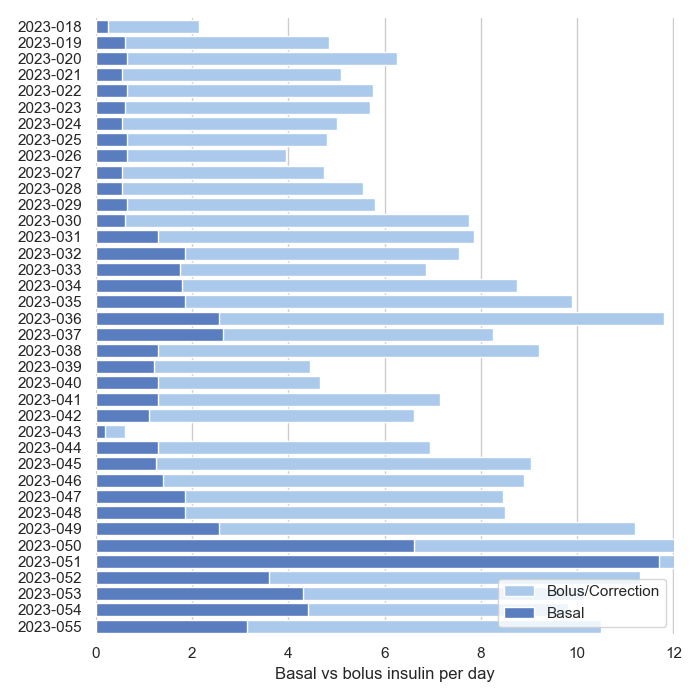

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(7, 7))

# Plot the insulin
sns.set_color_codes("pastel")
sns.barplot(x="total_insulin", y="yearday", data=df_insulin,
            label="Bolus/Correction", color="b")

# Plot the basal 
sns.set_color_codes("muted")
sns.barplot(x="total_basal", y="yearday", data=df_insulin,
            label="Basal", color="b")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(xlim=(0, 12), ylabel="",
       xlabel="Basal vs bolus insulin per day")
sns.despine(left=True, bottom=True)
ax.invert_yaxis()

fig.tight_layout()

Text(0.5, 0, 'Blood glucose from CGM (mg/dL)')

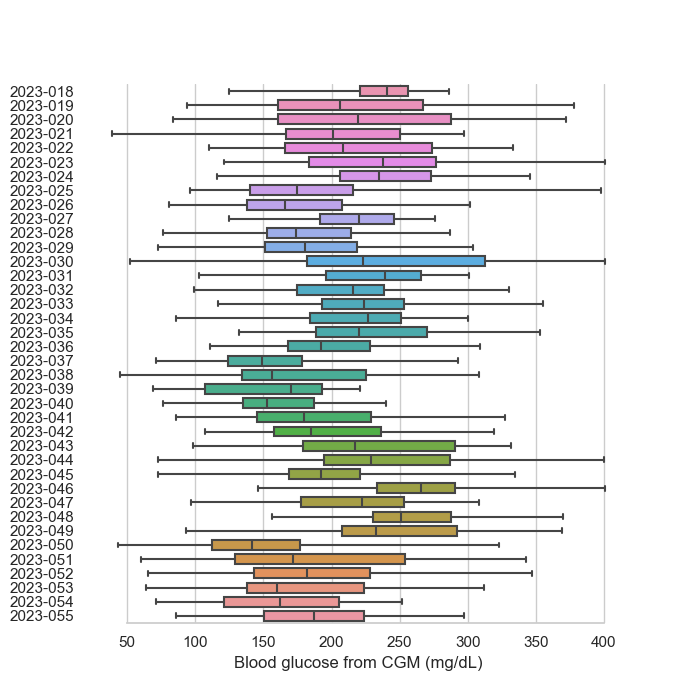

In [7]:
# Look at the cgm daily distributions (via kde/violin plots)
fig2, ax2 = plt.subplots(figsize=(7, 7))

sns.boxplot(y="yearday", x="bg", data=df_cgm,
            whis=[0, 100], width=.7)

ax2.invert_yaxis()
ax2.xaxis.grid(True)
ax2.set(ylabel="")
sns.despine(trim=True, left=True)

ax2.set_xlabel("Blood glucose from CGM (mg/dL)")

## Wrapping up for now
I think the two plots above are really interesting. But I think they need to be plotted side by side, or flipped and stacked. I want to see visually how insulin ratios might be correlated with CGM daily stats. And after I've done that I'd like to plot insulin vs cgm stats (not sure which ones exactly) on a scatter-plot. 

Also, totally unrelated but I was thinking about calculating an fft of each day... I think that the frequency content/periodicity might have something useful in it? And plotting different days' FFTs stacked up would basically be a spectrogram, which my fave. 